In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import requests library
import requests

# Import API key
from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | deputatskiy
Processing Record 2 of Set 1 | wharton
Processing Record 3 of Set 1 | port hedland
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | pisco
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | muriti
Processing Record 11 of Set 1 | asau
Processing Record 12 of Set 1 | omsukchan
Processing Record 13 of Set 1 | kaitangata
Processing Record 14 of Set 1 | laohekou
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | itoman
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | akyab
Processing Record 19 of Set 1 | nyurba
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | ahipara
Processing Record 22 of Set 1 | sitka
Processing Record 23 of Set 1 | guerrero negro
Processing Record 24 of Set 1 | vaini
Processing Record 25 of Set 1 |

Processing Record 43 of Set 4 | palasa
Processing Record 44 of Set 4 | rio gallegos
Processing Record 45 of Set 4 | mangrol
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | powell river
Processing Record 48 of Set 4 | hervey bay
Processing Record 49 of Set 4 | port elizabeth
Processing Record 50 of Set 4 | slave lake
Processing Record 1 of Set 5 | manbij
Processing Record 2 of Set 5 | innisfail
Processing Record 3 of Set 5 | touros
Processing Record 4 of Set 5 | leshukonskoye
Processing Record 5 of Set 5 | upernavik
Processing Record 6 of Set 5 | havelock
Processing Record 7 of Set 5 | bollnas
Processing Record 8 of Set 5 | puerto ayora
Processing Record 9 of Set 5 | donja dubica
Processing Record 10 of Set 5 | chokurdakh
Processing Record 11 of Set 5 | tuatapere
Processing Record 12 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 13 of Set 5 | makakilo city
Processing Record 14 of Set 5 | constitucion
Processing Record 15 of Set 5 | caravelas


Processing Record 33 of Set 8 | sur
Processing Record 34 of Set 8 | hay river
Processing Record 35 of Set 8 | talcahuano
Processing Record 36 of Set 8 | surt
Processing Record 37 of Set 8 | bakel
Processing Record 38 of Set 8 | nizhniy kuranakh
Processing Record 39 of Set 8 | mantua
Processing Record 40 of Set 8 | licata
Processing Record 41 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 42 of Set 8 | boyolangu
Processing Record 43 of Set 8 | kaduy
Processing Record 44 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 45 of Set 8 | yumaguzino
Processing Record 46 of Set 8 | elat
Processing Record 47 of Set 8 | pimentel
Processing Record 48 of Set 8 | kavieng
Processing Record 49 of Set 8 | pakxan
Processing Record 50 of Set 8 | aswan
Processing Record 1 of Set 9 | vanderhoof
Processing Record 2 of Set 9 | topeka
Processing Record 3 of Set 9 | biskamzha
Processing Record 4 of Set 9 | sillod
Processing Record 5 of Set 9 | vao
Processing Record 6 of Se

Processing Record 21 of Set 12 | uray
Processing Record 22 of Set 12 | ambilobe
Processing Record 23 of Set 12 | kurumkan
Processing Record 24 of Set 12 | ahmadpur sial
Processing Record 25 of Set 12 | chenghai
Processing Record 26 of Set 12 | bilibino
Processing Record 27 of Set 12 | fare
Processing Record 28 of Set 12 | hermon
Processing Record 29 of Set 12 | qasigiannguit
Processing Record 30 of Set 12 | roald
Processing Record 31 of Set 12 | suhbaatar
Processing Record 32 of Set 12 | trat
Processing Record 33 of Set 12 | lerwick
Processing Record 34 of Set 12 | jinxiang
Processing Record 35 of Set 12 | prieska
Processing Record 36 of Set 12 | port blair
Processing Record 37 of Set 12 | moose factory
Processing Record 38 of Set 12 | manggar
Processing Record 39 of Set 12 | tiznit
Processing Record 40 of Set 12 | honningsvag
Processing Record 41 of Set 12 | hokitika
Processing Record 42 of Set 12 | kaset sombun
Processing Record 43 of Set 12 | scottsdale
Processing Record 44 of Set 1

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Deputatskiy,69.3000,139.9000,-6.48,99,100,2.82,RU,2021-11-20 19:17:15
1,Wharton,29.3116,-96.1027,78.78,60,75,11.50,US,2021-11-20 19:15:28
2,Port Hedland,-20.3167,118.5667,80.65,74,100,9.22,AU,2021-11-20 19:17:15
3,Arraial Do Cabo,-22.9661,-42.0278,73.36,78,75,14.97,BR,2021-11-20 19:17:15
4,Pisco,-13.7000,-76.2167,71.65,73,20,6.91,PE,2021-11-20 19:17:16
5,Port Alfred,-33.5906,26.8910,64.33,71,100,15.86,ZA,2021-11-20 19:17:16
6,Hobart,-42.8794,147.3294,51.12,91,20,8.05,AU,2021-11-20 19:17:16
7,Albany,42.6001,-73.9662,45.57,55,100,1.99,US,2021-11-20 19:16:30
8,Ponta Do Sol,32.6667,-17.1000,66.83,71,100,2.42,PT,2021-11-20 19:17:17
9,Muriti,-1.9833,32.9167,75.04,72,83,16.20,TZ,2021-11-20 19:17:17


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

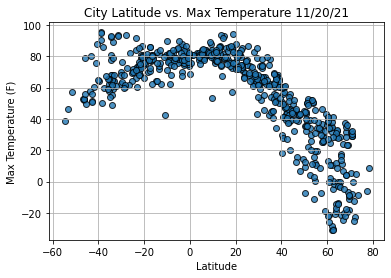

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

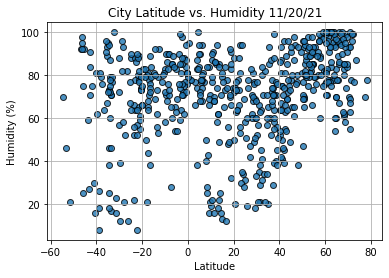

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

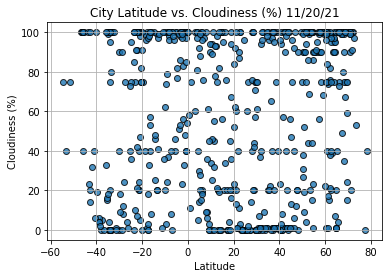

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

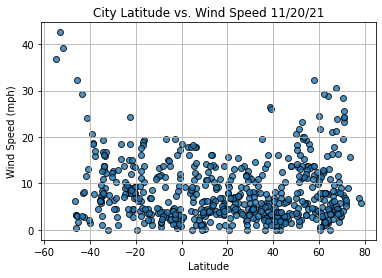

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

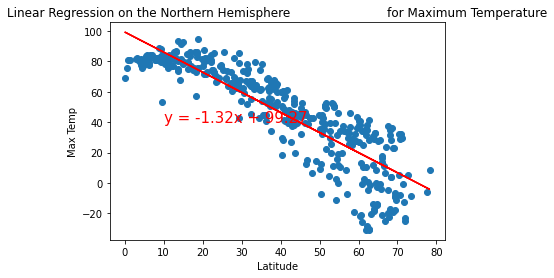

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

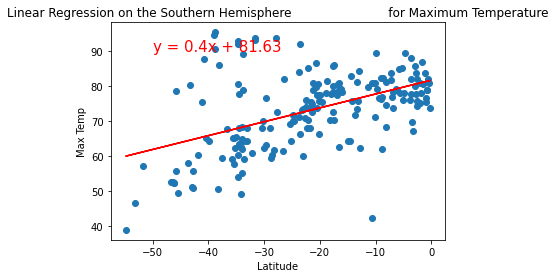

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

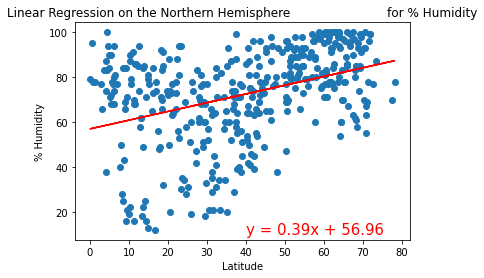

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

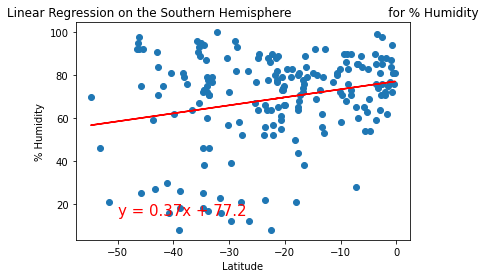

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

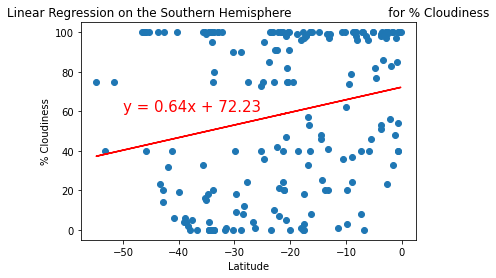

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

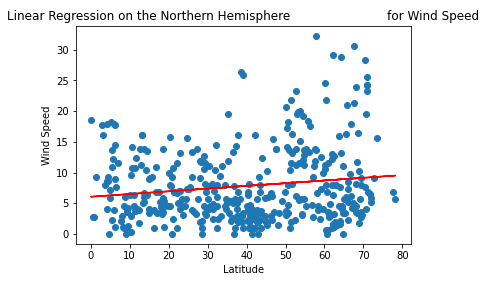

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

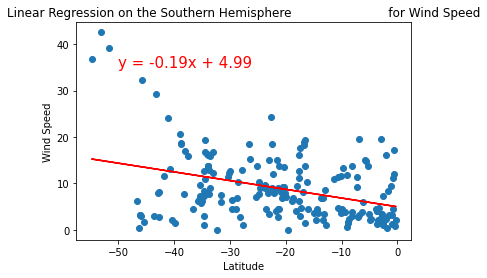

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))